In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Lê o arquivo CSV no Pandas usando 'enconding' para evitar possiveis erros de acentuação
df= pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')

In [ ]:
## Exibindo o DataFrame
df

In [ ]:
##Verificando se tem valores nulos
df.isnull().sum()

In [ ]:
##Verificando o tipo de dado das colunas
df.dtypes

In [ ]:
## Calcula a quantidade de vendas por categoria
dados_vendas=df.groupby('Category')['Sales'].sum()

## Mostra os dados armazenados na variavel
dados_vendas

In [ ]:
## Calcula a quantidade de vendas por sub-categoria exibindo os 10 primeiros resultados
sales=df.groupby('Sub-Category')['Sales'].sum().head(10)

## Mostra os dados armazenados na variavel
sales

In [25]:
## Converte a coluna 'Order Date' para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

## Cria uma coluna no DataFrame chamada 'Year'
df['Year'] = df['Order Date'].dt.year

## Cria uma coluna no DataFrame chamada 'Month'
df['Month'] = df['Order Date'].dt.month

## Agrupa os dados por ano e mês, calculando as vendas, e reseta o index transformando os dados agrupados de volta para colunas normais do Dataframe
vendas_mensais = df.groupby(['Year', 'Month'])["Sales"].sum().reset_index()


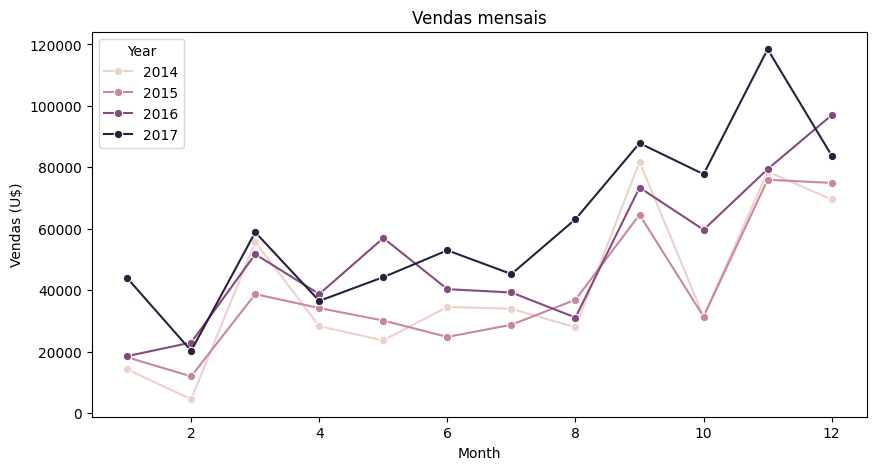

In [27]:
## Configura o tamanho do gráfico
plt.figure(figsize=(10,5))

## Cria um grafico de linhas utilizando os dados de 'vendas_mensais', colocando a coluna 'Month' no eixo x e a coluna 'Sales' no eixo y, e separa as linhas com 'Year' com marcadores nos pontos
sns.lineplot(data=vendas_mensais, x='Month', y='Sales', hue='Year', marker='o')

## Titulo do grafico
plt.title('Vendas mensais')

##legenda do eixo y
plt.ylabel('Vendas (U$)')

## Exibe o grafico criado
plt.show()

Text(0.5, 1.0, 'Sales for product')

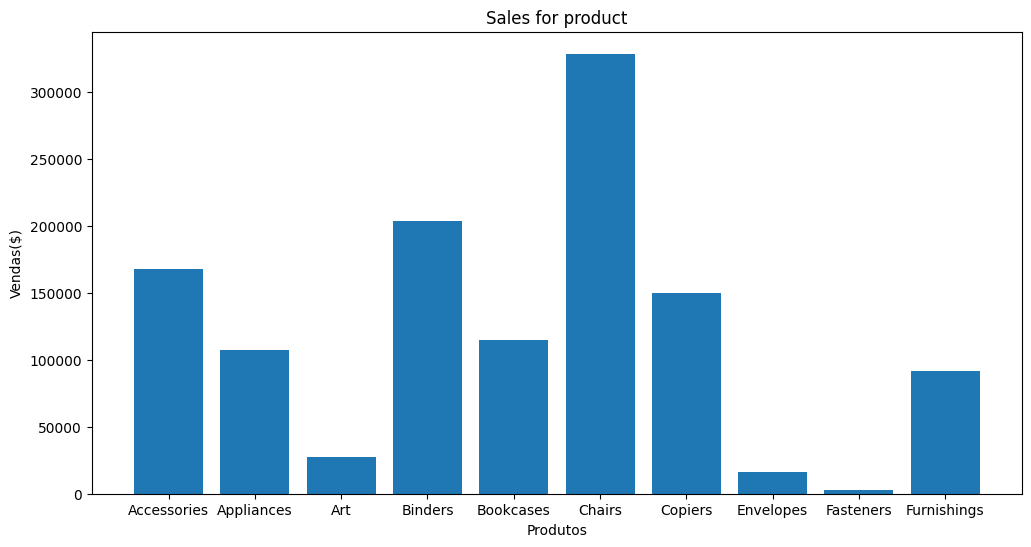

In [26]:
## Configura o tamanho do gráfico
plt.figure(figsize=(12,6))

## Configura um grafico de barras com sub-category no eixo x e sales no eixo y
plt.bar(sales.index, sales.values)

## Legenda do eixo x
plt.xlabel('Produtos')

## Legenda do eixo y
plt.ylabel('Vendas($)')

## Titulo do gráfico
plt.title('Sales for product')